In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else (x))

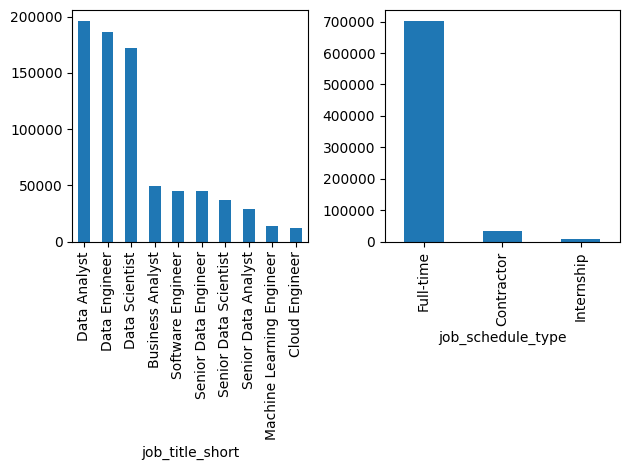

In [3]:
fig, ax = plt.subplots(1,2)
df['job_title_short'].value_counts().plot(kind='bar', ax = ax[0])
df['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax = ax[1])

fig.tight_layout()

In [3]:
df_exploded = df.explode('job_skills')
skills_count= df_exploded.groupby([ 'job_title_short','job_skills']).size()
df_skills= skills_count.reset_index(name= 'skill_count')
df_skills= df_skills.sort_values(by='skill_count', ascending=False)
df_skills

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
462,Data Analyst,chainer,1
432,Cloud Engineer,wrike,1
410,Cloud Engineer,theano,1
24,Business Analyst,chainer,1


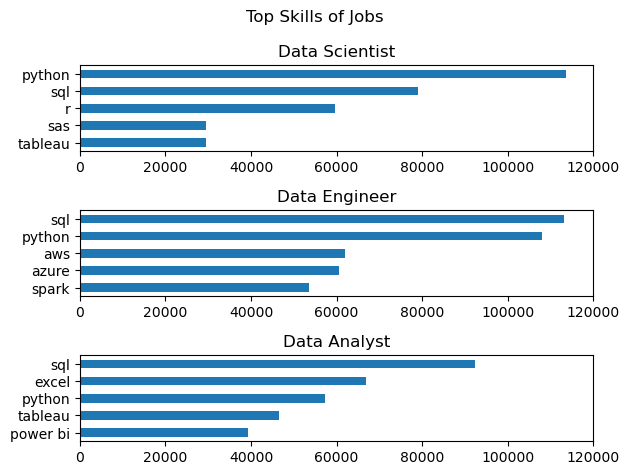

In [5]:
job_titles = ['Data Scientist', 'Data Engineer', 'Data Analyst']
fig, ax = plt.subplots(3,1)

for i , job_title in enumerate(job_titles):
    df_plot = df_skills[df_skills['job_title_short'] == job_title].head(5)
    df_plot.plot(
        kind='barh', 
        x='job_skills', 
        y='skill_count', 
        ax=ax[i], 
        title= job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,120000)

fig.suptitle('Top Skills of Jobs')
fig.tight_layout()



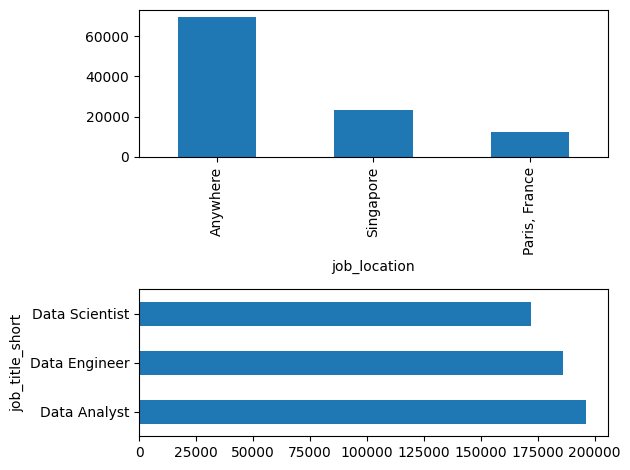

In [6]:
fig, ax = plt.subplots(2, 1)
df['job_location'].value_counts().head(3).plot(kind='bar', ax = ax[0])
df['job_title_short'].value_counts().head(3).plot(kind='barh', ax = ax[1])
fig.tight_layout()


In [7]:
df_type = df.groupby(['job_schedule_type', 'job_title_short']).size().reset_index(name='job_count').sort_values(by='job_count', ascending=False)

df_type

,job_schedule_type,job_title_short,job_count
38,Full-time,Data Analyst,168975
39,Full-time,Data Engineer,165225
40,Full-time,Data Scientist,153278
36,Full-time,Business Analyst,44106
45,Full-time,Software Engineer,42314
...,...,...,...
235,Per diem,Data Engineer,1
237,Per diem,Software Engineer,1
260,Volunteer,Machine Learning Engineer,1
261,Volunteer,Senior Data Analyst,1


In [ ]:
schedules = ['Full-time', 'Part-time', 'Contractor', 'Internship']

fig, ax = plt.subplots(2,2, figsize =(  8,12))
axes = ax.flatten()

for i, schedule in enumerate(schedules):
    df_count=df_type[df_type['job_schedule_type'] == schedule].head(3)
    
    df_count.plot(
        kind='bar',
        x= 'job_title_short',
        y= 'job_count',
        ax = axes[i],
        title= schedule,
        legend = False)
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel('Job Title')

plt.tight_layout()
    

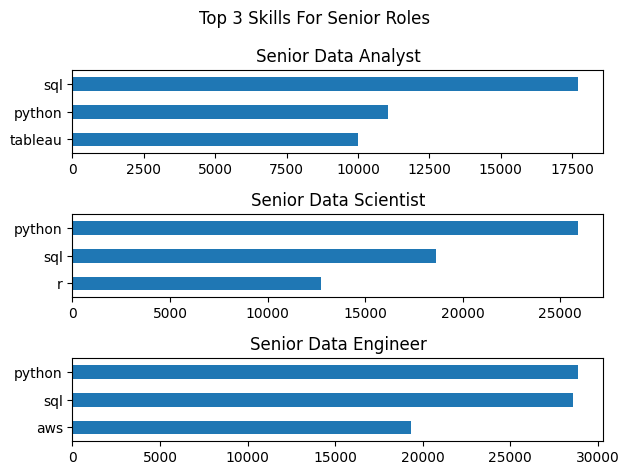

In [42]:
job_roles = ['Senior Data Analyst', 'Senior Data Scientist', 'Senior Data Engineer']

fig, ax = plt.subplots(3,1)

for j , role in enumerate(job_roles):
    senior_skills = df_skills[df_skills['job_title_short'] == role].head(3)
    senior_skills.plot(
        kind= 'barh',
        ax = ax[j],
        x= 'job_skills',
        y= 'skill_count',
        title= role,
        legend= False)
    ax[j].set_ylabel('')
    ax[j].invert_yaxis()
fig.suptitle('Top 3 Skills For Senior Roles')
fig.tight_layout()
